In [3]:
from fracdiff.sklearn import Fracdiff
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt

In [11]:
start_date = '1990-01-01'
end_date = '2023-06-01'
data = np.array((pdr.get_data_fred('SP500', start = start_date, end = end_date)).dropna())


In [20]:
#Calculate the fractional differentiation
window = 100
f = Fracdiff(0.48, mode = 'valid', window = window)
frac_data = f.fit_transform(data)
# Calculate a simple differencing function for comparison
diff_data = np.reshape(np.diff(data[:, 0]), (-1, 1))
# Harmonizing time indices
data = data[window - 1:, ]
diff_data = diff_data[window - 2:, ]

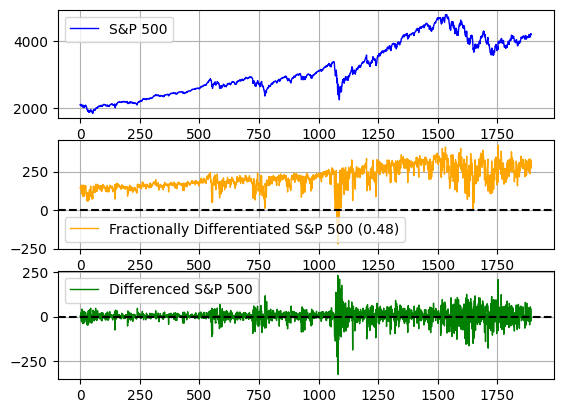

In [16]:
#визуализация
fig, axes = plt.subplots(nrows = 3, ncols = 1)
axes[0].plot(data[5:,], label = 'S&P 500', color = 'blue', linewidth = 1)
axes[1].plot(frac_data[5:,], label =
 'Fractionally Differentiated S&P 500 (0.48)',
 color = 'orange', linewidth = 1)
axes[2].plot(diff_data[5:,], label =
 'Differenced S&P 500', color = 'green', linewidth = 1)
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[0].grid()
axes[1].grid()
axes[2].grid()
axes[1].axhline(y = 0, color = 'black', linestyle = 'dashed')
axes[2].axhline(y = 0, color = 'black', linestyle = 'dashed') 

In [17]:
#стационарность- точно? проверка - ADF test augmeneted dickey fuller
from statsmodels.tsa.stattools import adfuller
print('p-value: %f' % adfuller(data)[1])
print('p-value: %f' % adfuller(frac_data)[1])
print('p-value: %f' % adfuller(diff_data)[1])
# The original S&P 500 dataset is nonstationary
# The fractionally differentiated S&P 500 dataset is stationary
# The normally differenced S&P 500 dataset is stationary

p-value: 0.763507
p-value: 0.000371
p-value: 0.000000


In [27]:
#daily values of EURUSD
start_date = '1990-01-01'
end_date = '2023-06-01'
df = np.array((pdr.get_data_fred('DEXUSEU', start = start_date, end = end_date)).dropna())
#Calculate the fractional differentiation
window = 100
f = Fracdiff(0.2, mode = 'valid', window = window)
frac_df = f.fit_transform(df)
# Calculate a simple differencing function for comparison
diff_df = np.reshape(np.diff(df[:, 0]), (-1, 1))
# Harmonizing time indices
df = df[window - 1:, ]
diff_df = diff_df[window - 2:, ]
print('p-value: %f' % adfuller(df)[1])
print('p-value: %f' % adfuller(frac_df)[1])
print('p-value: %f' % adfuller(diff_df)[1])

p-value: 0.397494
p-value: 0.043214
p-value: 0.000000


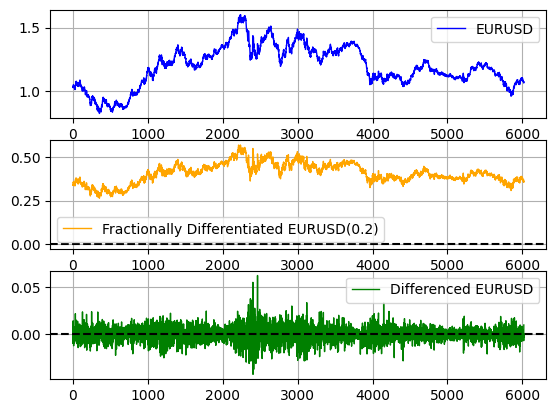

In [28]:
fig, axes = plt.subplots(nrows = 3, ncols = 1)
axes[0].plot(df[5:,], label = 'EURUSD', color = 'blue', linewidth = 1)
axes[1].plot(frac_df[5:,], label =
 'Fractionally Differentiated EURUSD(0.2)',
 color = 'orange', linewidth = 1)
axes[2].plot(diff_df[5:,], label =
 'Differenced EURUSD', color = 'green', linewidth = 1)
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[0].grid()
axes[1].grid()
axes[2].grid()
axes[1].axhline(y = 0, color = 'black', linestyle = 'dashed')
axes[2].axhline(y = 0, color = 'black', linestyle = 'dashed') 

In [ ]:
#вывод- фракционное дифференцирование сохраняет "память", и делает процесссы стационарными